<a href="https://colab.research.google.com/github/Jasmellerp/Practicas-/blob/main/WorkShopIA2024Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

In [ ]:
#Cargar la data del dataset en una variable
diabetes = load_diabetes()

In [ ]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [ ]:
matriz = [[0,1,2,3,4,5,6,7],
 [0,1,2,3,4,5,6,7],
 [10,1,2,3,14,5,6,7],
 [20,1,2,3,24,5,6,7],
 [30,1,2,3,34,5,6,7],
 [40,1,2,3,44,5,6,7],
 [50,1,2,3,54,5,6,7],
 [60,1,2,3,64,5,6,7]]

listaFilas = matriz[4] #Formato del Rango en Python
columna = [fila[4] for fila in matriz[3:6][:]]

#Como navegar en matrices
#Arreglos de 2 dimensiones, como llego a un elemento? cual es la dirección?
print( columna) #Posición Específica
print(matriz[6]) #Fila específica
print(matriz[:]) #Todas las Filas
print(matriz[:][6]) #De todas las Filas Solo la posición específica
print(matriz[3:][4]) #De un rango de Filas Solo la posición específica
print(matriz[5:7]) #De un rango de Filas Solo la posición específica

print(len(X))

[24, 34, 44]
[50, 1, 2, 3, 54, 5, 6, 7]
[[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [10, 1, 2, 3, 14, 5, 6, 7], [20, 1, 2, 3, 24, 5, 6, 7], [30, 1, 2, 3, 34, 5, 6, 7], [40, 1, 2, 3, 44, 5, 6, 7], [50, 1, 2, 3, 54, 5, 6, 7], [60, 1, 2, 3, 64, 5, 6, 7]]
[50, 1, 2, 3, 54, 5, 6, 7]
[60, 1, 2, 3, 64, 5, 6, 7]
[[40, 1, 2, 3, 44, 5, 6, 7], [50, 1, 2, 3, 54, 5, 6, 7]]
442


In [ ]:
listaFilasDiabetes = diabetes.data[:][:] #Formato del Rango en Python
columnaDiabetes = [fila[8] for fila in listaFilasDiabetes]

X = columnaDiabetes
Y = diabetes.target

print(len(X))

442


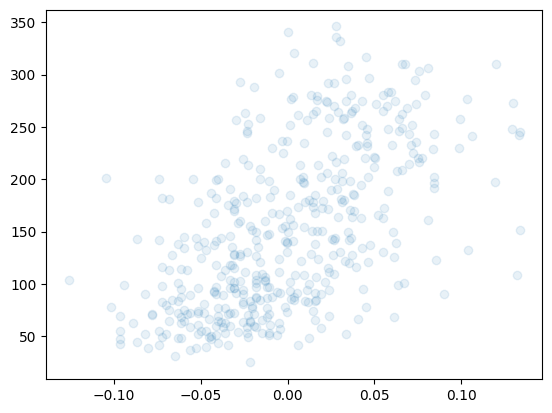

In [ ]:
plt.scatter(X,Y,alpha = 0.10)
plt.show()

In [ ]:
XPrueba = X[400:]
XEntrenamiento = X[:400]

XPrueba = np.array(XPrueba)
XEntrenamiento = np.array(XEntrenamiento)

YPrueba = Y[400:]
YEntrenamiento = Y[:400]

YPrueba = np.array(YPrueba)
YEntrenamiento = np.array(YEntrenamiento)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
numeroCaracteristicas = np.prod(XEntrenamiento.shape)
numeroCaracteristicas

400

In [ ]:
modelo = Sequential()
modelo.add(Dense(1, activation = "linear",input_dim = 1,))

In [ ]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelo.compile(optimizer='rmsprop', loss='mse', metrics= ["mae"])
modelo.fit(XEntrenamiento,YEntrenamiento,batch_size = 1, epochs= 50)

Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 29195.8008 - mae: 152.3950
Epoch 2/50
400/400 [==============================] - 1s 1ms/step - loss: 29088.0918 - mae: 152.0419
Epoch 3/50
400/400 [==============================] - 1s 1ms/step - loss: 28980.8496 - mae: 151.6868
Epoch 4/50
400/400 [==============================] - 1s 1ms/step - loss: 28872.6895 - mae: 151.3320
Epoch 5/50
400/400 [==============================] - 1s 1ms/step - loss: 28765.7852 - mae: 150.9794
Epoch 6/50
400/400 [==============================] - 1s 1ms/step - loss: 28657.1523 - mae: 150.6247
Epoch 7/50
400/400 [==============================] - 1s 1ms/step - loss: 28550.8418 - mae: 150.2711
Epoch 8/50
400/400 [==============================] - 1s 1ms/step - loss: 28445.1016 - mae: 149.9187
Epoch 9/50
400/400 [==============================] - 1s 1ms/step - loss: 28338.7520 - mae: 149.5650
Epoch 10/50
400/400 [==============================] - 1s 1ms/step - loss: 28233.6406 - mae

In [ ]:
mse , mae = modelo.evaluate(XPrueba,YPrueba)
print(mse,mae)

2/2 [==============================] - 0s 7ms/step - loss: 22527.7031 - mae: 130.4032
22527.703125 130.4031982421875
